In [59]:
!pip install beautifulsoup4


In [60]:
from bs4 import BeautifulSoup
soup = BeautifulSoup("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M", 'html.parser')

print(soup.prettify())

https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M



/opt/conda/envs/Python36/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [61]:
import requests
import pandas as pd
# Set headers
headers = requests.utils.default_headers()
headers.update({ 'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'})


In [62]:


url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
req = requests.get(url, headers)
soup = BeautifulSoup(req.content, 'html.parser')
print(soup.prettify())




<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"Xh9eFQpAAEYAAH1zMX4AAABN","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":935851093,"wgRevisionId":935851093,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Communi

# FINDING HTML ELEMENTS AND EXTRACTING DATA

In [63]:
table=soup.find('table', attrs={"class": "wikitable"}) 
table_extract = table.find_all('tr')

l=['Postal Code','Borough','Neighborhood']
p=pd.DataFrame(columns=l)
for item in table_extract:
    rows = item.contents
    if(rows[1].text not in p['Postal Code'].values.tolist()):
        if(rows[5].text.replace('\n','')=='Not assigned'):
            c=rows[3].text
        else:
            c=rows[5].text
        if(len(rows)>3):
            if(rows[3].text!='Not assigned'):
                p = p.append({'Postal Code':rows[1].text,'Borough':rows[3].text,'Neighborhood':c.replace('\n','')}, ignore_index=True)
    else:
        i=p.index[p['Postal Code']==rows[1].text]
        p.iloc[i[0]]['Neighborhood']+=','+rows[5].text.replace('\n','')

p=p.drop(0)
p

,Postal Code,Borough,Neighborhood
1,M3A,North York,Parkwoods
2,M4A,North York,Victoria Village
3,M5A,Downtown Toronto,Harbourfront
4,M6A,North York,"Lawrence Heights,Lawrence Manor"
5,M7A,Downtown Toronto,Queen's Park
6,M9A,Queen's Park,Queen's Park
7,M1B,Scarborough,"Rouge,Malvern"
8,M3B,North York,Don Mills North
9,M4B,East York,"Woodbine Gardens,Parkview Hill"
10,M5B,Downtown Toronto,"Ryerson,Garden District"


In [64]:
p.shape

(103, 3)

In [65]:
#!pip install geocoder

In [66]:
p['Postal Code'].values[0]

'M3A'

In [67]:

lat=[]
long=[]
# initialize your variable to None
lat_lng_coords = None
pc=p['Postal Code'].values
b=p['Borough'].unique()

n=p['Neighborhood'].values
df = pd.read_csv("http://cocl.us/Geospatial_data")

p=pd.merge(p, df, on='Postal Code')
p

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights,Lawrence Manor",43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
5,M9A,Queen's Park,Queen's Park,43.667856,-79.532242
6,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens,Parkview Hill",43.706397,-79.309937
9,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937


In [68]:
CLIENT_ID = 'BZAFURVTJLLX1LD20A4FHNGJOQHYMR2YWUNY4CLTOERA1IKR' # your Foursquare ID
CLIENT_SECRET = 'ZSFYHJVJ35HKTYWTDM0B5IAP2BHTDKBDU3GJBE2S4320P0TO' # your Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
LIMIT=500

Your credentails:
CLIENT_ID: BZAFURVTJLLX1LD20A4FHNGJOQHYMR2YWUNY4CLTOERA1IKR
CLIENT_SECRET:ZSFYHJVJ35HKTYWTDM0B5IAP2BHTDKBDU3GJBE2S4320P0TO


In [69]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
          
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [70]:

venues = getNearbyVenues(names=p['Borough'],latitudes=p['Latitude'],longitudes=p['Longitude'])


In [71]:
venues

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,North York,43.753259,-79.329656,GTA Restoration,43.753396,-79.333477,Fireworks Store
2,North York,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,North York,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,North York,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
5,North York,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
6,North York,43.725882,-79.315572,The Frig,43.727051,-79.317418,French Restaurant
7,North York,43.725882,-79.315572,Eglinton Ave E & Sloane Ave/Bermondsey Rd,43.726086,-79.313620,Intersection
8,North York,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place
9,Downtown Toronto,43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery


In [72]:
# create map
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
import numpy as np

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library
# set number of clusters
# one hot encoding
toronto_venues=venues
toronto_onehot = pd.concat([venues,pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")],axis=1)
toronto_onehot

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Accessories Store,Afghan Restaurant,Airport,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,North York,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,North York,43.753259,-79.329656,GTA Restoration,43.753396,-79.333477,Fireworks Store,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,North York,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,North York,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,North York,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,North York,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,North York,43.725882,-79.315572,The Frig,43.727051,-79.317418,French Restaurant,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,North York,43.725882,-79.315572,Eglinton Ave E & Sloane Ave/Bermondsey Rd,43.726086,-79.313620,Intersection,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,North York,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Downtown Toronto,43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
res_col=toronto_onehot.columns.tolist()
r=res_col[0:5]
for i in res_col:
    if (i.find('Restaurant')>0):
        r.append(i)
toronto_onehot=toronto_onehot[r]
toronto_onehot

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,...,Portuguese Restaurant,Ramen Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,North York,43.753259,-79.329656,Brookbanks Park,43.751976,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,North York,43.753259,-79.329656,GTA Restoration,43.753396,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,North York,43.753259,-79.329656,Variety Store,43.751974,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,North York,43.725882,-79.315572,Victoria Village Arena,43.723481,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,North York,43.725882,-79.315572,Tim Hortons,43.725517,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,North York,43.725882,-79.315572,Portugril,43.725819,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,North York,43.725882,-79.315572,The Frig,43.727051,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,North York,43.725882,-79.315572,Eglinton Ave E & Sloane Ave/Bermondsey Rd,43.726086,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,North York,43.725882,-79.315572,Pizza Nova,43.725824,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Downtown Toronto,43.654260,-79.360636,Roselle Desserts,43.653447,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:

toronto_grouped = toronto_onehot.groupby('Borough').mean().reset_index()

toronto_grouped_clustering = toronto_grouped.drop(['Borough','Borough Latitude','Borough Longitude','Venue Latitude'], 1)
toronto_grouped_clustering

,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,...,Portuguese Restaurant,Ramen Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0.000000,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.009091,0.000000,0.000000,...,0.000000,0.000000,0.009091,0.000000,0.036364,0.000000,0.009091,0.000000,0.009091,0.009091
1,0.000764,0.010695,0.008403,0.000764,0.001528,0.000000,0.002292,0.009167,0.000764,0.004584,...,0.001528,0.005348,0.015279,0.000000,0.011459,0.000764,0.010695,0.000764,0.012987,0.005348
2,0.000000,0.024000,0.008000,0.000000,0.000000,0.000000,0.008000,0.000000,0.000000,0.008000,...,0.000000,0.000000,0.008000,0.000000,0.008000,0.000000,0.008000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.013333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.026667,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.000000,...,0.000000,0.000000,0.013699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.008163,0.016327,0.000000,0.000000,0.000000,0.008163,0.008163,0.000000,0.004082,...,0.004082,0.012245,0.000000,0.000000,0.020408,0.000000,0.004082,0.000000,0.000000,0.008163
7,0.000000,0.010526,0.000000,0.000000,0.000000,0.000000,0.010526,0.042105,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021053,0.000000,0.000000,0.021053
8,0.000000,0.000000,0.018072,0.000000,0.000000,0.006024,0.000000,0.000000,0.000000,0.000000,...,0.006024,0.000000,0.000000,0.006024,0.012048,0.000000,0.012048,0.000000,0.012048,0.012048
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [75]:
toronto_grouped

,Borough,Borough Latitude,Borough Longitude,Venue Latitude,Afghan Restaurant,American Restaurant,Asian Restaurant,Belgian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,...,Portuguese Restaurant,Ramen Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Taiwanese Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Central Toronto,43.698134,-79.398207,43.699023,0.000000,0.018182,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.009091,0.000000,0.036364,0.000000,0.009091,0.000000,0.009091,0.009091
1,Downtown Toronto,43.652283,-79.382207,43.652509,0.000764,0.010695,0.008403,0.000764,0.001528,0.000000,...,0.001528,0.005348,0.015279,0.000000,0.011459,0.000764,0.010695,0.000764,0.012987,0.005348
2,East Toronto,43.668781,-79.336460,43.668606,0.000000,0.024000,0.008000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.008000,0.000000,0.008000,0.000000,0.008000,0.000000,0.000000,0.000000
3,East York,43.705434,-79.344713,43.705438,0.000000,0.000000,0.013333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.026667,0.000000,0.000000,0.000000,0.000000,0.000000
4,Etobicoke,43.653135,-79.542093,43.652722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.013699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Mississauga,43.636966,-79.615819,43.637604,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,North York,43.754887,-79.400928,43.754573,0.000000,0.008163,0.016327,0.000000,0.000000,0.000000,...,0.004082,0.012245,0.000000,0.000000,0.020408,0.000000,0.004082,0.000000,0.000000,0.008163
7,Scarborough,43.763275,-79.269141,43.762960,0.000000,0.010526,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021053,0.000000,0.000000,0.021053
8,West Toronto,43.651174,-79.446815,43.651128,0.000000,0.000000,0.018072,0.000000,0.000000,0.006024,...,0.006024,0.000000,0.000000,0.006024,0.012048,0.000000,0.012048,0.000000,0.012048,0.012048
9,York,43.687959,-79.464594,43.687451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


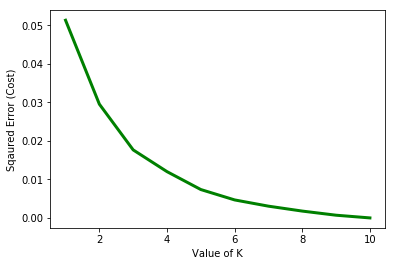

0

In [76]:

import matplotlib.pyplot as plt
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(toronto_grouped_clustering) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 

cost.index(max(cost))



# We see that 4 clusters seems to be the best value of K

In [77]:
kclusters = 5
indicators = ['st', 'nd', 'rd']
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

In [58]:
kmeans.labels_[0:10] 

array([1, 1, 4, 1, 2, 3, 2, 2, 1, 0], dtype=int32)

In [79]:


def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [80]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Borough'] = toronto_grouped['Borough']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, 3:], num_top_venues)

neighborhoods_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Toronto,Sushi Restaurant,American Restaurant,Indian Restaurant,Italian Restaurant,Vietnamese Restaurant,Chinese Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Middle Eastern Restaurant
1,Downtown Toronto,Italian Restaurant,Japanese Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,American Restaurant,Thai Restaurant,Chinese Restaurant,Asian Restaurant,Mexican Restaurant
2,East Toronto,Greek Restaurant,Italian Restaurant,American Restaurant,Fast Food Restaurant,Caribbean Restaurant,Indian Restaurant,Latin American Restaurant,Middle Eastern Restaurant,Comfort Food Restaurant,Thai Restaurant
3,East York,Sushi Restaurant,Indian Restaurant,Fast Food Restaurant,Mexican Restaurant,Asian Restaurant,Vietnamese Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant
4,Etobicoke,Fast Food Restaurant,Middle Eastern Restaurant,Seafood Restaurant,Japanese Restaurant,Chinese Restaurant,Dim Sum Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant
5,Mississauga,Middle Eastern Restaurant,American Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant
6,North York,Fast Food Restaurant,Japanese Restaurant,Sushi Restaurant,Asian Restaurant,Italian Restaurant,Ramen Restaurant,Caribbean Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Vietnamese Restaurant
7,Scarborough,Fast Food Restaurant,Chinese Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Thai Restaurant,Indian Restaurant,American Restaurant,Caribbean Restaurant,Italian Restaurant,Korean Restaurant
8,West Toronto,Italian Restaurant,Asian Restaurant,Mexican Restaurant,Vietnamese Restaurant,Thai Restaurant,Sushi Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Cuban Restaurant,Latin American Restaurant
9,York,Fast Food Restaurant,Caribbean Restaurant,Vietnamese Restaurant,Doner Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant


In [81]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [38]:
neighborhoods_venues_sorted

,Cluster Labels,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Central Toronto,Sushi Restaurant,American Restaurant,Indian Restaurant,Italian Restaurant,Vietnamese Restaurant,Chinese Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Middle Eastern Restaurant
1,0,Downtown Toronto,Italian Restaurant,Japanese Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,American Restaurant,Thai Restaurant,Chinese Restaurant,Asian Restaurant,Mexican Restaurant
2,3,East Toronto,Greek Restaurant,Italian Restaurant,American Restaurant,Fast Food Restaurant,Caribbean Restaurant,Indian Restaurant,Latin American Restaurant,Middle Eastern Restaurant,Comfort Food Restaurant,Thai Restaurant
3,0,East York,Sushi Restaurant,Indian Restaurant,Fast Food Restaurant,Mexican Restaurant,Asian Restaurant,Vietnamese Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant
4,0,Etobicoke,Fast Food Restaurant,Middle Eastern Restaurant,Seafood Restaurant,Japanese Restaurant,Chinese Restaurant,Dim Sum Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant
5,1,Mississauga,Middle Eastern Restaurant,American Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant
6,0,North York,Fast Food Restaurant,Japanese Restaurant,Sushi Restaurant,Asian Restaurant,Italian Restaurant,Ramen Restaurant,Caribbean Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Vietnamese Restaurant
7,0,Scarborough,Fast Food Restaurant,Chinese Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Thai Restaurant,Indian Restaurant,American Restaurant,Caribbean Restaurant,Italian Restaurant,Korean Restaurant
8,0,West Toronto,Italian Restaurant,Asian Restaurant,Mexican Restaurant,Vietnamese Restaurant,Thai Restaurant,Sushi Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Cuban Restaurant,Latin American Restaurant
9,2,York,Fast Food Restaurant,Caribbean Restaurant,Vietnamese Restaurant,Doner Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant


In [82]:

# check cluster labels generated for each row in the dataframe
# add clustering labels
toronto_merged = p .drop(['Postal Code','Neighborhood'],axis=1)
# check the last columns!
toronto_merged

,Borough,Latitude,Longitude
0,North York,43.753259,-79.329656
1,North York,43.725882,-79.315572
2,Downtown Toronto,43.654260,-79.360636
3,North York,43.718518,-79.464763
4,Downtown Toronto,43.662301,-79.389494
5,Queen's Park,43.667856,-79.532242
6,Scarborough,43.806686,-79.194353
7,North York,43.745906,-79.352188
8,East York,43.706397,-79.309937
9,Downtown Toronto,43.657162,-79.378937


In [83]:

toronto_merged=toronto_merged.drop_duplicates('Borough')


In [84]:
toronto_merged

,Borough,Latitude,Longitude
0,North York,43.753259,-79.329656
2,Downtown Toronto,43.654260,-79.360636
5,Queen's Park,43.667856,-79.532242
6,Scarborough,43.806686,-79.194353
8,East York,43.706397,-79.309937
11,Etobicoke,43.650943,-79.554724
16,York,43.693781,-79.428191
19,East Toronto,43.676357,-79.293031
31,West Toronto,43.669005,-79.442259
61,Central Toronto,43.728020,-79.388790


In [85]:
# merge neighborhoods_venues_sorted with nyc_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Borough'), on='Borough')


In [86]:
toronto_merged.reset_index(drop=True)#removing Queen's Park as its postal code is not present in data

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,43.753259,-79.329656,2.0,Fast Food Restaurant,Japanese Restaurant,Sushi Restaurant,Asian Restaurant,Italian Restaurant,Ramen Restaurant,Caribbean Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Vietnamese Restaurant
1,Downtown Toronto,43.654260,-79.360636,1.0,Italian Restaurant,Japanese Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,American Restaurant,Thai Restaurant,Chinese Restaurant,Asian Restaurant,Mexican Restaurant
2,Queen's Park,43.667856,-79.532242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scarborough,43.806686,-79.194353,2.0,Fast Food Restaurant,Chinese Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Thai Restaurant,Indian Restaurant,American Restaurant,Caribbean Restaurant,Italian Restaurant,Korean Restaurant
4,East York,43.706397,-79.309937,1.0,Sushi Restaurant,Indian Restaurant,Fast Food Restaurant,Mexican Restaurant,Asian Restaurant,Vietnamese Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant
5,Etobicoke,43.650943,-79.554724,2.0,Fast Food Restaurant,Middle Eastern Restaurant,Seafood Restaurant,Japanese Restaurant,Chinese Restaurant,Dim Sum Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant
6,York,43.693781,-79.428191,0.0,Fast Food Restaurant,Caribbean Restaurant,Vietnamese Restaurant,Doner Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant
7,East Toronto,43.676357,-79.293031,4.0,Greek Restaurant,Italian Restaurant,American Restaurant,Fast Food Restaurant,Caribbean Restaurant,Indian Restaurant,Latin American Restaurant,Middle Eastern Restaurant,Comfort Food Restaurant,Thai Restaurant
8,West Toronto,43.669005,-79.442259,1.0,Italian Restaurant,Asian Restaurant,Mexican Restaurant,Vietnamese Restaurant,Thai Restaurant,Sushi Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Cuban Restaurant,Latin American Restaurant
9,Central Toronto,43.728020,-79.388790,1.0,Sushi Restaurant,American Restaurant,Indian Restaurant,Italian Restaurant,Vietnamese Restaurant,Chinese Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Middle Eastern Restaurant


In [87]:
toronto_merged.drop(toronto_merged.index[2],inplace=True)

In [103]:
toronto_merged.reset_index(drop=True,inplace=True)

In [104]:

map_clusters = folium.Map(location=[56.1304,-106.3468], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Borough'], (toronto_merged['Cluster Labels'])):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# we have now clustered boroughs 

# CLUSTER 1: American cuisine is famous in Mississauga, hence company must open a American raw food store here.

In [105]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[0] + list(range(4, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Mississauga,Middle Eastern Restaurant,American Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant


# CLUSTER 2: Italian cuisine and sushi is famous in Downtown Toronto,West Toronto , East York and Central Toronto, hence company must open a Italian and sushi raw food store here.

In [106]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[0] + list(range(4, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Downtown Toronto,Italian Restaurant,Japanese Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,American Restaurant,Thai Restaurant,Chinese Restaurant,Asian Restaurant,Mexican Restaurant
3,East York,Sushi Restaurant,Indian Restaurant,Fast Food Restaurant,Mexican Restaurant,Asian Restaurant,Vietnamese Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant
7,West Toronto,Italian Restaurant,Asian Restaurant,Mexican Restaurant,Vietnamese Restaurant,Thai Restaurant,Sushi Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Cuban Restaurant,Latin American Restaurant
8,Central Toronto,Sushi Restaurant,American Restaurant,Indian Restaurant,Italian Restaurant,Vietnamese Restaurant,Chinese Restaurant,Greek Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Middle Eastern Restaurant


# CLUSTER 3: Fast food restaurants are generally popular in North York,Scarborough,East york,Etobicoke and York hence company must have fast food making raw material shop in these boroughs.

In [107]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[0] + list(range(4, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,Fast Food Restaurant,Japanese Restaurant,Sushi Restaurant,Asian Restaurant,Italian Restaurant,Ramen Restaurant,Caribbean Restaurant,Middle Eastern Restaurant,Chinese Restaurant,Vietnamese Restaurant
2,Scarborough,Fast Food Restaurant,Chinese Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Thai Restaurant,Indian Restaurant,American Restaurant,Caribbean Restaurant,Italian Restaurant,Korean Restaurant
4,Etobicoke,Fast Food Restaurant,Middle Eastern Restaurant,Seafood Restaurant,Japanese Restaurant,Chinese Restaurant,Dim Sum Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant


# CLUSTER 4: Greek cuisine is popular in East Toronto , hence company should put up a store of Greek raw items in East Toronto.


In [108]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[0] + list(range(4, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,East Toronto,Greek Restaurant,Italian Restaurant,American Restaurant,Fast Food Restaurant,Caribbean Restaurant,Indian Restaurant,Latin American Restaurant,Middle Eastern Restaurant,Comfort Food Restaurant,Thai Restaurant


# CLUSTER 5: Fast food restaurants and Caribbean restaurants are generally popular in York, hence company must have fast food and Caribbean food making raw material shop in these boroughs.

In [109]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0 , toronto_merged.columns[[0] + list(range(4, toronto_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,York,Fast Food Restaurant,Caribbean Restaurant,Vietnamese Restaurant,Doner Restaurant,German Restaurant,French Restaurant,Filipino Restaurant,Falafel Restaurant,Ethiopian Restaurant,Empanada Restaurant
